In [1]:
import matplotlib
#matplotlib.use('TKagg')
import matplotlib.pyplot as plt
import sys
import os
import pandas as pd
import json 
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def json_load(filename):
   with open(filename) as f_in:
       return(json.load(f_in)["mean"]["point_estimate"])

In [3]:
def load_files(dirname):
    folders = os.listdir(dirname)
    #print(folders)
    csv_files = list(map(lambda name: os.path.join(os.path.join(dirname, name),'new/raw.csv'), folders))

    #print(csv_files)


    df_from_each_file = (pd.read_csv(f, sep=',') for f in csv_files)
    #print(list(df_from_each_file))
    df_from_each_file = (f.head(1) for f in df_from_each_file)
    #print(list(df_from_each_file))
    return df_from_each_file
dirname = './benchmarks_schedulers/sequential'
df_from_each_file = list(load_files(dirname)) 


In [4]:
df_merged   = pd.concat(df_from_each_file, ignore_index=True)

del df_merged["group"]
del df_merged["throughput_type"]
del df_merged["sample_measured_value"]
del df_merged["unit"]
del df_merged["iteration_count"]



In [5]:
folders = df_merged['value']
df_merged["time"] = list(map(lambda name: json_load(os.path.join(os.path.join(dirname, name),'new/estimates.json')), folders))



In [6]:

time = df_merged['time']
value = df_merged['value']

In [7]:
def size_calculation(value):
    element_size = int(value.split("-")[0])
    vector_size = int(value.split("-")[1])
    matrixs_size =  (((32 * element_size * element_size) * 3) * 2) * vector_size
    #normal_elements_size = ((6 * 32 * 1000) + (2 * 32 * 1000) + (6 * 32)) * vector_size
   
    return matrixs_size /8

In [8]:
#df_merged["throughput"] = list(map(lambda ab: float(ab[0]/ab[1]) ,list(zip(throughput_num, time))))
#df_merged['size'] = list(map(lambda value: value/(1024**2), throughput_num))
#df_merged['time'] = list(map(lambda value: value/1000000, time))
#df_merged['element_size'] = list(map(lambda size:  int(size.split("-")[0]),value))
#df_merged['vector_size'] = list(map(lambda size: int(size.split("-")[1]),value))



del df_merged["throughput_num"]
df_merged['element_size'] = list(map(lambda size:  int(size.split("-")[0]),value))
df_merged['vector_size'] = list(map(lambda size: int(size.split("-")[1]),value))
df_merged["throughput_num"] = list(map(lambda v: size_calculation(v), value))
df_merged['time'] = list(map(lambda value: value/1000000, time))
df_merged["throughput"] = list(map(lambda ab: float(ab[0]/ab[1]) ,list(zip(df_merged["throughput_num"], df_merged['time']))))
df_merged['size'] = list(map(lambda value: value/(1024**2), df_merged["throughput_num"]))




In [9]:
a = df_merged.sort_values(by=["size"], ascending=False)
b = df_merged.sort_values(by=["time"], ascending=True)
#a.to_csv( "merged.csv")
#b.to_csv( "merged2.csv")


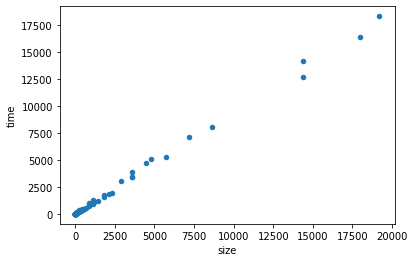

In [10]:

a.plot(x='size', y='time', kind = 'scatter')
plt.show()

<AxesSubplot:xlabel='size'>

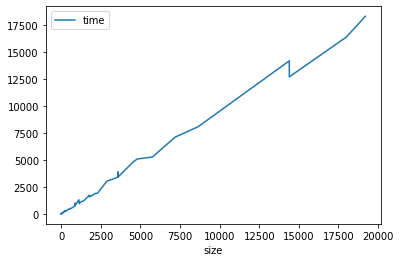

In [11]:
a.plot(x='size', y="time")

<AxesSubplot:xlabel='size', ylabel='time'>

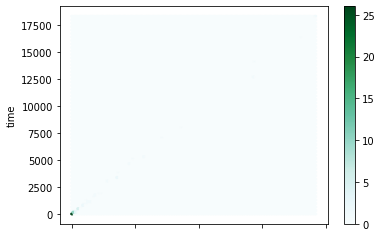

In [12]:
a.plot(x='size', y="time", kind='hexbin')

<AxesSubplot:xlabel='time', ylabel='size'>

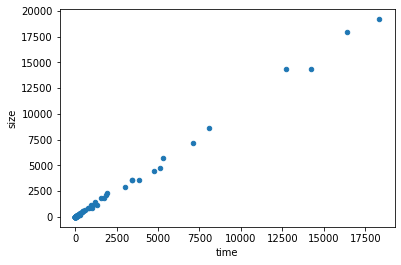

In [13]:
a.plot(x='time', y='size', kind = 'scatter')

<AxesSubplot:xlabel='time'>

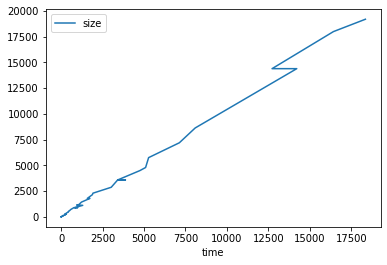

In [14]:
a.plot(x='time', y='size')


In [15]:
a

,function,value,time,element_size,vector_size,throughput_num,throughput,size
9,sequential,1024-800,18343.430278,1024,800,2.013266e+10,1.097541e+06,19200.00000
59,sequential,256-12000,16416.035500,256,12000,1.887437e+10,1.149752e+06,18000.00000
27,sequential,1024-600,12717.216654,1024,600,1.509949e+10,1.187327e+06,14400.00000
21,sequential,256-9600,14206.637910,256,9600,1.509949e+10,1.062848e+06,14400.00000
46,sequential,1024-360,8084.742640,1024,360,9.059697e+09,1.120592e+06,8640.00000
...,...,...,...,...,...,...,...,...
17,sequential,64-24,2.490186,64,24,2.359296e+06,9.474376e+05,2.25000
10,sequential,32-48,1.008537,32,48,1.179648e+06,1.169662e+06,1.12500
45,sequential,64-12,0.933217,64,12,1.179648e+06,1.264066e+06,1.12500
57,sequential,32-24,0.667969,32,24,5.898240e+05,8.830113e+05,0.56250


In [16]:
b.loc[b['time']  > 500 ]

,function,value,time,element_size,vector_size,throughput_num,throughput,size
12,sequential,512-120,585.734372,512,120,7.549747e+08,1.288937e+06,720.0
70,sequential,256-600,774.676676,256,600,9.437184e+08,1.218209e+06,900.0
58,sequential,128-2400,819.580177,128,2400,9.437184e+08,1.151466e+06,900.0
50,sequential,1024-48,943.016452,1024,48,1.207960e+09,1.280953e+06,1152.0
19,sequential,64-9600,994.773656,64,9600,9.437184e+08,9.486765e+05,900.0
52,sequential,256-800,1074.618600,256,800,1.258291e+09,1.170919e+06,1200.0
72,sequential,512-240,1232.091025,512,240,1.509949e+09,1.225518e+06,1440.0
40,sequential,64-12000,1308.243959,64,12000,1.179648e+09,9.017034e+05,1125.0
16,sequential,256-1200,1583.838996,256,1200,1.887437e+09,1.191685e+06,1800.0
64,sequential,128-4800,1740.064553,128,4800,1.887437e+09,1.084694e+06,1800.0


In [17]:
b

,function,value,time,element_size,vector_size,throughput_num,throughput,size
55,sequential,32-12,0.333702,32,12,2.949120e+05,8.837589e+05,0.28125
57,sequential,32-24,0.667969,32,24,5.898240e+05,8.830113e+05,0.56250
45,sequential,64-12,0.933217,64,12,1.179648e+06,1.264066e+06,1.12500
10,sequential,32-48,1.008537,32,48,1.179648e+06,1.169662e+06,1.12500
17,sequential,64-24,2.490186,64,24,2.359296e+06,9.474376e+05,2.25000
...,...,...,...,...,...,...,...,...
46,sequential,1024-360,8084.742640,1024,360,9.059697e+09,1.120592e+06,8640.00000
27,sequential,1024-600,12717.216654,1024,600,1.509949e+10,1.187327e+06,14400.00000
21,sequential,256-9600,14206.637910,256,9600,1.509949e+10,1.062848e+06,14400.00000
59,sequential,256-12000,16416.035500,256,12000,1.887437e+10,1.149752e+06,18000.00000


<AxesSubplot:xlabel='time'>

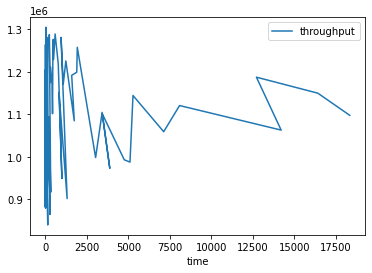

In [18]:
a.plot(x='time', y='throughput')


<AxesSubplot:xlabel='size'>

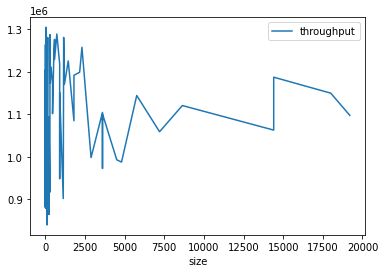

In [19]:
a.plot(x='size', y='throughput')


<AxesSubplot:xlabel='vector_size'>

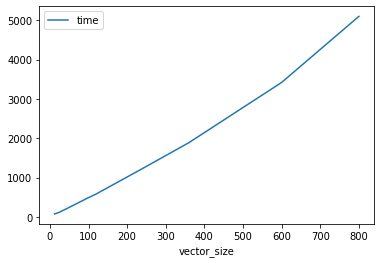

In [20]:
a[a.value.str.contains(r"^512")].plot(x='vector_size', y='time')


<AxesSubplot:xlabel='element_size'>

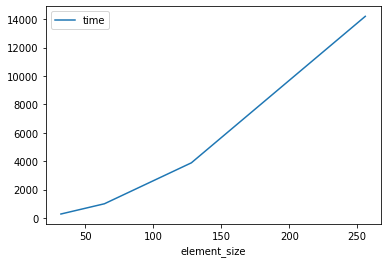

In [21]:
a[a.value.str.contains(r".*-9600")].plot(x='element_size', y='time')


<AxesSubplot:xlabel='vector_size'>

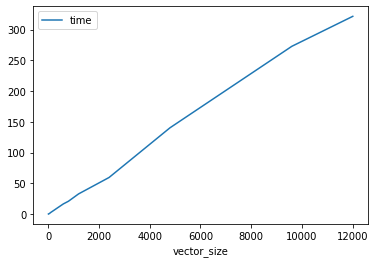

In [22]:
a[a.value.str.contains(r"^32")].plot(x='vector_size', y='time')


<AxesSubplot:xlabel='element_size'>

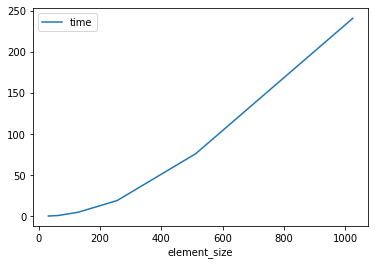

In [23]:
a[a.value.str.contains(r".*-12$")].plot(x='element_size', y='time')


In [24]:
a[a.value.str.contains(r".*-800$")]

,function,value,time,element_size,vector_size,throughput_num,throughput,size
9,sequential,1024-800,18343.430278,1024,800,2.013266e+10,1.097541e+06,19200.00
69,sequential,512-800,5096.419303,512,800,5.033165e+09,9.875884e+05,4800.00
52,sequential,256-800,1074.618600,256,800,1.258291e+09,1.170919e+06,1200.00
48,sequential,128-800,267.950530,128,800,3.145728e+08,1.173996e+06,300.00
66,sequential,64-800,84.318188,64,800,7.864320e+07,9.326956e+05,75.00
65,sequential,32-800,21.062315,32,800,1.966080e+07,9.334586e+05,18.75


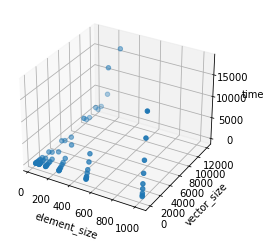

In [25]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(a['element_size'], a['vector_size'],a['time'])
threedee.set_xlabel('element_size')
threedee.set_ylabel('vector_size')
threedee.set_zlabel('time')
plt.show()

No handles with labels found to put in legend.


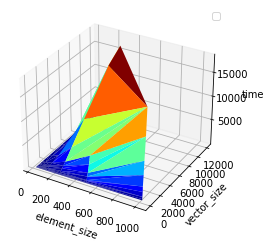

In [26]:
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel("element_size")
ax.set_ylabel("vector_size")
ax.set_zlabel("time")
ax.legend()

ax.plot_trisurf(a['element_size'], a['vector_size'],a['time'], cmap=plt.cm.jet, linewidth=0.2)
plt.show()

No handles with labels found to put in legend.


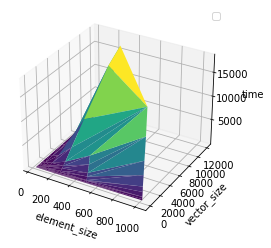

In [27]:
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(a['element_size'], a['vector_size'],a['time'], cmap=plt.cm.viridis, linewidth=0.2)
ax.set_xlabel("element_size")
ax.set_ylabel("vector_size")
ax.set_zlabel("time")
ax.legend()
plt.show()

No handles with labels found to put in legend.


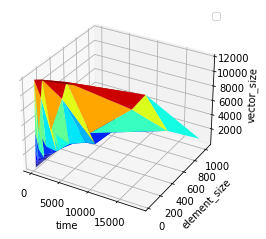

In [28]:
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(a['time'], a['element_size'],a['vector_size'], cmap=plt.cm.jet, linewidth=0.1)
ax.set_xlabel("time")
ax.set_ylabel("element_size")
ax.set_zlabel("vector_size")
ax.legend()
plt.show()

<AxesSubplot:xlabel='element_size'>

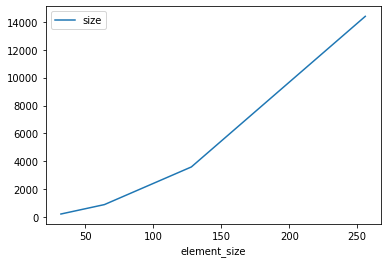

In [29]:
a[a.value.str.contains(r".*-9600")].plot(x='element_size', y='size')


<AxesSubplot:xlabel='element_size'>

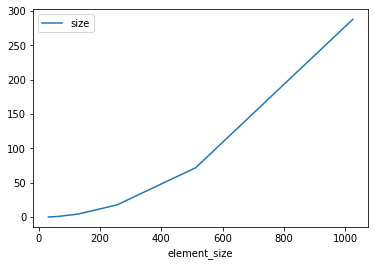

In [30]:
a[a.value.str.contains(r".*-12$")].plot(x='element_size', y='size')


<AxesSubplot:xlabel='vector_size'>

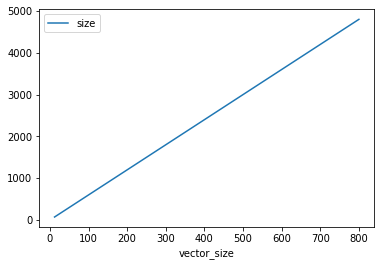

In [31]:
a[a.value.str.contains(r"^512")].plot(x='vector_size', y='size')


<AxesSubplot:xlabel='vector_size'>

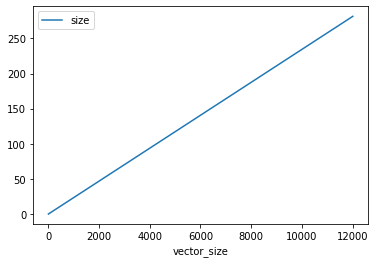

In [32]:
a[a.value.str.contains(r"^32")].plot(x='vector_size', y='size')


In [33]:
b[b.value.str.contains(r"^512")]

,function,value,time,element_size,vector_size,throughput_num,throughput,size
49,sequential,512-12,76.006326,512,12,7.549747e+07,9.933051e+05,72.0
32,sequential,512-24,117.899521,512,24,1.509949e+08,1.280709e+06,144.0
38,sequential,512-48,234.560284,512,48,3.019899e+08,1.287472e+06,288.0
4,sequential,512-96,473.220934,512,96,6.039798e+08,1.276317e+06,576.0
12,sequential,512-120,585.734372,512,120,7.549747e+08,1.288937e+06,720.0
72,sequential,512-240,1232.091025,512,240,1.509949e+09,1.225518e+06,1440.0
71,sequential,512-360,1889.064890,512,360,2.264924e+09,1.198966e+06,2160.0
39,sequential,512-600,3417.900573,512,600,3.774874e+09,1.104442e+06,3600.0
69,sequential,512-800,5096.419303,512,800,5.033165e+09,9.875884e+05,4800.0
